# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [3]:
data = pd.read_csv('ML_Datasets/compresive_strength_concrete.csv')

In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [5]:
#Checking for 'null' values
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
corr_data = data.corr()
#print(corr_data)

data_features = corr_data.index
#print(data[data_features].corr())
plt.figure(figsize= (28,28))
#sns.heatmap(data[data_features].corr(),annot=True,cmap="YlGnBu")

<Figure size 2016x2016 with 0 Axes>

<Figure size 2016x2016 with 0 Axes>

### Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels)

In [10]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [11]:
Valueable_cols = ['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Concrete compressive strength(MPa, megapascals) ']
Valueable_data = data[Valueable_cols]
Valueable_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,2.5,79.99
1,540.0,0.0,2.5,61.89
2,332.5,142.5,0.0,40.27
3,332.5,142.5,0.0,41.05
4,198.6,132.4,0.0,44.30


In [12]:
x = (Valueable_data.iloc[:,:-1])
y = (Valueable_data.iloc[:,-1])

In [13]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture)
0,540.0,0.0,2.5
1,540.0,0.0,2.5
2,332.5,142.5,0.0
3,332.5,142.5,0.0
4,198.6,132.4,0.0
...,...,...,...
1025,276.4,116.0,8.9
1026,322.2,0.0,10.4
1027,148.5,139.4,6.1
1028,159.1,186.7,11.3


In [14]:
## Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
#train = Valueable_data.sample(frac=0.70, random_state=325)
## you can't simply split 0.70 and 0.30 without overlapping
## this code tries to find that train = 70% and test = 30%
#test = Valueable_data.loc[~Valueable_data.index.isin(train.index), :]
#xtrain = train.iloc[:,:-1]
#ytrain = train.iloc[:,-1]

#xtest = test.iloc[:,:-1]
#ytest = test.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=55)

In [16]:
#X = data.iloc[:,:-1]         # Features - All columns but last
#y = data.iloc[:,-1]          # Target - Last Column

In [17]:

print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(xtest.shape)

(721, 3)
(721,)
(309, 3)
(309, 3)


In [18]:

#Normalize
mean = xtrain.mean(axis=0)
xtrain -= mean
std = xtrain.std(axis=0)
xtrain /= std
xtest -= mean
xtest /= std

print('=====mean====')
print(mean)
print('=====std====')
print(std)

=====mean====
Cement (component 1)(kg in a m^3 mixture)                282.836893
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     76.190014
Superplasticizer (component 5)(kg in a m^3 mixture)        6.203051
dtype: float64
=====std====
Cement (component 1)(kg in a m^3 mixture)                104.165965
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     85.694216
Superplasticizer (component 5)(kg in a m^3 mixture)        5.926941
dtype: float64


In [19]:
xtrain.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture)
448,-1.108202,0.626763,0.269439
78,1.015333,0.244007,0.994940
450,-1.049641,-0.304455,0.050102
498,0.692770,-0.667373,1.028684
941,-1.437484,1.563816,-0.523550


In [20]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 448 to 461
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              721 non-null    float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  721 non-null    float64
 2   Superplasticizer (component 5)(kg in a m^3 mixture)    721 non-null    float64
dtypes: float64(3)
memory usage: 22.5 KB


#### Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

In [21]:
print('No. of features = ',xtrain.shape[1])

No. of features =  3


In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu',
                           input_shape=(xtrain.shape[1],)))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dense(10, activation='tanh'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### Train the Model with Epochs (100) and validate it

In [ ]:
##k fold validation with relu
#k = 4
#num_val_samples = len(xtrain) // k
#num_epochs = 100
#all_scores = []
#
#for i in range(k):
#    print('processing fold #', i)
#    val_data = xtrain[i * num_val_samples: (i + 1) * num_val_samples]
#    val_targets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
#    print('num_val_samples = ',num_val_samples,',val_data = xtrain[',i * num_val_samples,':',(i + 1) * num_val_samples,']')
#    partial_train_data = np.concatenate(
#        [xtrain[:i * num_val_samples],xtrain[(i + 1) * num_val_samples:]],axis=0)
#    partial_train_targets = np.concatenate([ytrain[:i * num_val_samples],
#                                            ytrain[(i + 1) * num_val_samples:]],axis=0)
#    model = build_model()
#    model.fit(partial_train_data, partial_train_targets,
#              epochs=num_epochs, batch_size=1, verbose=0)
#    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#    all_scores.append(val_mae)

In [ ]:
#all_scores

In [ ]:
#np.mean(all_scores)

In [ ]:
#k = 4
#num_val_samples = len(train_data) // k
#num_epochs = 100
#all_mae_histories = []
#for i in range(k):
#    print('processing fold #', i)
#    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
#    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
#    partial_train_data = np.concatenate(
#        [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
#    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
#                                            train_targets[(i + 1) * num_val_samples:]],axis=0)
#    model = build_model()
#    history = model.fit(partial_train_data, partial_train_targets,
#                        validation_data=(val_data, val_targets),
#                        epochs=num_epochs, batch_size=1, verbose=0)
#    mae_history = history.history['val_mae']
#    all_mae_histories.append(mae_history)


In [ ]:
#average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
#plt.xlabel('Epochs')
#plt.ylabel('Validation MAE')
#plt.show()

In [23]:
model_relu = build_model()
model_relu.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model_relu.fit(xtrain, ytrain,epochs= 25, batch_size=6, validation_split=0.2)

Epoch 1/25
96/96 [==============================] - 5s 23ms/step - loss: 147.8786 - mae: 9.7412 - val_loss: 161.2795 - val_mae: 10.2887
Epoch 2/25
96/96 [==============================] - 1s 12ms/step - loss: 146.5230 - mae: 9.6848 - val_loss: 159.9616 - val_mae: 10.2633
Epoch 3/25
96/96 [==============================] - 1s 12ms/step - loss: 146.5974 - mae: 9.7270 - val_loss: 160.0121 - val_mae: 10.2523
Epoch 4/25
96/96 [==============================] - 1s 12ms/step - loss: 145.9168 - mae: 9.6856 - val_loss: 159.4178 - val_mae: 10.2306
Epoch 5/25
96/96 [==============================] - 1s 9ms/step - loss: 145.8258 - mae: 9.7034 - val_loss: 159.0734 - val_mae: 10.2171
Epoch 6/25
96/96 [==============================] - 1s 11ms/step - loss: 145.1382 - mae: 9.6496 - val_loss: 158.3345 - val_mae: 10.2047
Epoch 7/25
96/96 [==============================] - 1s 9ms/step - loss: 144.2699 - mae: 9.6462 - val_loss: 159.9971 - val_mae: 10.2550
Epoch 8/25
96/96 [==============================] 

## Evaluation Step

In [28]:
test_mse_score, test_mae_score = model_relu.evaluate(xtest, ytest)

10/10 [==============================] - 0s 4ms/step - loss: 167.8125 - mae: 10.4338


In [29]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [30]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

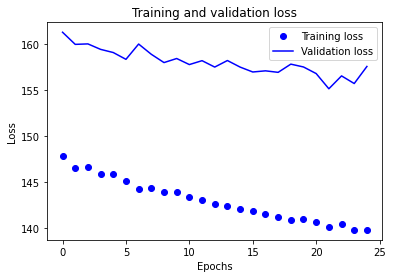

In [31]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(len(history_dict['loss']))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
y_predict = model_relu.predict(xtest)

In [33]:
y_predict

array([[25.084871],
       [34.080753],
       [46.415855],
       [47.120743],
       [47.120743],
       [59.373383],
       [52.376163],
       [30.855528],
       [49.272717],
       [30.58529 ],
       [24.2632  ],
       [29.114258],
       [26.219162],
       [59.373383],
       [37.46536 ],
       [39.008175],
       [29.487833],
       [35.101086],
       [31.23081 ],
       [62.47869 ],
       [62.213226],
       [30.175688],
       [21.204418],
       [52.806923],
       [42.372677],
       [27.105066],
       [34.942455],
       [55.200073],
       [21.26721 ],
       [29.096   ],
       [20.801292],
       [37.850555],
       [30.58529 ],
       [35.459846],
       [15.824613],
       [47.567986],
       [29.114258],
       [26.678263],
       [36.27986 ],
       [18.795015],
       [50.060215],
       [29.8562  ],
       [25.17623 ],
       [51.9542  ],
       [36.27986 ],
       [18.37125 ],
       [26.495077],
       [35.079887],
       [25.4206  ],
       [30.58529 ],


In [34]:
Valueable_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [35]:
y_pred = y_predict.flatten()

(0.0, 100.0)

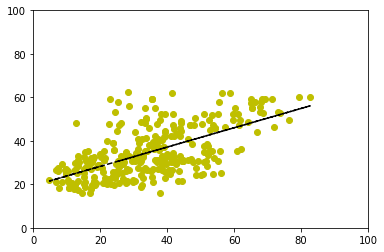

In [36]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(ytest,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(ytest,y_pred, 'yo', ytest, poly1d_fn(ytest), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)

In [ ]:
#test.plot(kind='scatter',
#        y='Cement (component 1)(kg in a m^3 mixture)'
#          ,x='Concrete compressive strength(MPa, megapascals) ',
#        title ='Weight and Height in adults')
#plt.plot(ytest,y_predict,color='red',linewidth=3)